In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.utils import resample


In [24]:
data= pd.read_csv('/datasets/Churn.csv')




In [25]:
print(data)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [26]:
# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)

In [27]:
print(data)

      RowNumber  CustomerId  CreditScore  Age  Tenure    Balance  \
0             1    15634602          619   42     2.0       0.00   
1             2    15647311          608   41     1.0   83807.86   
2             3    15619304          502   42     8.0  159660.80   
3             4    15701354          699   39     1.0       0.00   
4             5    15737888          850   43     2.0  125510.82   
...         ...         ...          ...  ...     ...        ...   
9995       9996    15606229          771   39     5.0       0.00   
9996       9997    15569892          516   35    10.0   57369.61   
9997       9998    15584532          709   36     7.0       0.00   
9998       9999    15682355          772   42     3.0   75075.31   
9999      10000    15628319          792   28     NaN  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  ...  \
0                 1          1               1        101348.88  ...   
1                 1          0         

In [28]:
display(data)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2.0,0.00,1,1,1,101348.88,...,0,0,0,0,0,0,0,0,0,0
1,2,15647311,608,41,1.0,83807.86,1,0,1,112542.58,...,0,0,0,0,0,0,0,0,1,0
2,3,15619304,502,42,8.0,159660.80,3,1,0,113931.57,...,0,0,0,0,0,0,0,0,0,0
3,4,15701354,699,39,1.0,0.00,2,0,0,93826.63,...,0,0,0,0,0,0,0,0,0,0
4,5,15737888,850,43,2.0,125510.82,1,1,1,79084.10,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5.0,0.00,2,1,0,96270.64,...,0,0,0,0,0,0,0,0,0,1
9996,9997,15569892,516,35,10.0,57369.61,1,1,1,101699.77,...,0,0,0,0,0,0,0,0,0,1
9997,9998,15584532,709,36,7.0,0.00,1,0,1,42085.58,...,0,0,0,0,0,0,0,0,0,0
9998,9999,15682355,772,42,3.0,75075.31,2,1,0,92888.52,...,0,0,0,0,0,0,0,1,0,1


In [29]:
# Handle missing values if any
data = data.dropna()

In [30]:
display(data)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2.0,0.00,1,1,1,101348.88,...,0,0,0,0,0,0,0,0,0,0
1,2,15647311,608,41,1.0,83807.86,1,0,1,112542.58,...,0,0,0,0,0,0,0,0,1,0
2,3,15619304,502,42,8.0,159660.80,3,1,0,113931.57,...,0,0,0,0,0,0,0,0,0,0
3,4,15701354,699,39,1.0,0.00,2,0,0,93826.63,...,0,0,0,0,0,0,0,0,0,0
4,5,15737888,850,43,2.0,125510.82,1,1,1,79084.10,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,15719294,800,29,2.0,0.00,2,0,0,167773.55,...,0,0,0,0,0,0,0,0,0,0
9995,9996,15606229,771,39,5.0,0.00,2,1,0,96270.64,...,0,0,0,0,0,0,0,0,0,1
9996,9997,15569892,516,35,10.0,57369.61,1,1,1,101699.77,...,0,0,0,0,0,0,0,0,0,1
9997,9998,15584532,709,36,7.0,0.00,1,0,1,42085.58,...,0,0,0,0,0,0,0,0,0,0


# Class Balance Examination:


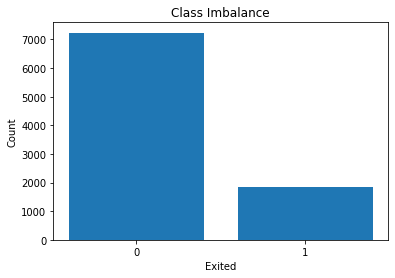

0    7237
1    1854
Name: Exited, dtype: int64


In [31]:
# Check the balance of classes
class_counts = data['Exited'].value_counts()

# Visualize class imbalance
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Exited')
plt.ylabel('Count')
plt.xticks([0, 1])
plt.title('Class Imbalance')
plt.show()

# Calculate class proportions
class_proportions = class_counts / class_counts.sum()
print(class_counts)


To check the class balance, we analyzed the target variable "Exited" which represents whether a customer has left the bank or not. We labeled the observations as follows:

Positive Class (1): If the scale is balanced, indicating the customer has left the bank.
Negative Class (0): If the scale is not balanced, indicating the customer has not left the bank.
Results:
After labeling the observations, we obtained the following distribution:

0 (Negative Class) 7237
1 (Positive Class) 1854


Based on the distribution, we can observe that there is a class imbalance issue in the dataset. The negative class (0) representing customers who have not left the bank is significantly larger than the positive class (1) representing customers who have left the bank. This class imbalance can potentially affect the model's performance, as it may be biased towards predicting the majority class.

Implications:
The class imbalance has important implications for model training and evaluation. Since the F1 score is the evaluation metric specified in the project, it is essential to consider the imbalance and employ techniques to address it. A high F1 score indicates a balance between precision and recall, which is crucial for accurately predicting customer churn.

Initial Model Training:



In [32]:
# Split the dataset into training and testing sets
X = data.drop('Exited', axis=1)
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.0


Based on the provided F1 score of 0.0, it suggests that the model's performance is poor and is not able to accurately predict the positive class. This is confirm based on previous Class Balance Examination

# Final Testing:


In [36]:

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC Score:", auc_roc)

AUC-ROC Score: 0.5
